# <b><u> Project Title : Book Recommendation System </u></b>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Content </b>

The Book-Crossing dataset comprises 3 files.

##**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

##**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

##**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, *expressed* on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. 

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Books Data
book_df= pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Het Kothari/Books.csv')
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#Check Columns
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
# Users data
users_df= pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Het Kothari/Users.csv')
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Ratings Data
ratings_df= pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Het Kothari/Ratings.csv')
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#Shape of Books data
print(book_df.shape)

(271360, 8)


In [ ]:
#Shape of users data
print(users_df.shape)

(278858, 3)


In [ ]:
#Shape of ratings data
print(ratings_df.shape)

(1149780, 3)


# **Data Preprocessing**

**Books Data**

Let's chech is there any null value in each dataset.

In [ ]:
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
#We delete rows with empty cells
book_df = book_df.dropna(axis = 0)

#check the missing value
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

* Now we don't have any missing value in books data.

In [ ]:
book_df.shape

(271354, 8)

In [ ]:
# Displaying the datatypes of the features.
book_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [ ]:
book_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

* We have 0 years presents.
* There are some misleading value. We need to modify these.

In [ ]:
# We are converting the data types of year of publication to int data type.
book_df['Year-Of-Publication']= book_df['Year-Of-Publication'].astype(np.int32)

In [ ]:
# First we are filling the nan value where the years are greater than 2006 and 0 then replacing the nan with mean value.
book_df.loc[(book_df['Year-Of-Publication'] > 2021) | (book_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with mean value of Year-Of-Publication
book_df['Year-Of-Publication'].fillna(round(book_df['Year-Of-Publication'].mean()), inplace=True)

In [ ]:
book_df['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923., 2020.,
       1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928., 1929.,
       1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924., 1921.,
       1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935., 1806.,
       2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922., 1897.,
       1376.])

**Users Data**

In [ ]:
# Check the missing value for Users data.
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
users_df.shape

(278858, 3)

In [ ]:
# Displaying the datatypes of the features
users_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [ ]:
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

**Ratings Data**

In [ ]:
# Check the missing value for Rating data.
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

* We don't have any missing value in Rating data.

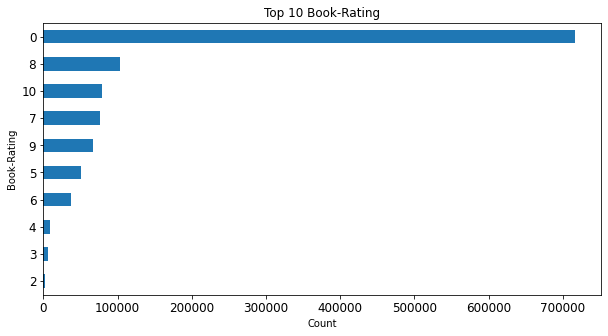

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = ratings_df['Book-Rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('Count')
plt.ylabel('Book-Rating')
plt.show()

* We can see that most of the people haven't given the ratings.

In [ ]:
#Check if duplicates present in our Books data.
len(book_df[book_df.duplicated()])

0

In [ ]:
#Check if duplicates present in our Users data.
len(users_df[users_df.duplicated()])

0

In [ ]:
#Check if duplicates present in our Ratings data.
len(ratings_df[ratings_df.duplicated()])

0

* We don't have duplicates in Books, Users, and Ratings data.

In [ ]:
# Meriging rating and book data with the help of ISBN.
new_rating= ratings_df[ratings_df.ISBN.isin(book_df.ISBN)]

# Creating new rating data by meriging existing new_rating and users data with the help of User-ID.
new_rating= new_rating[new_rating['User-ID'].isin(users_df['User-ID'])]

In [ ]:
new_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Check the ratings data and new_rating data shapes
print(ratings_df.shape)
print(new_rating.shape)

(1149780, 3)
(1031129, 3)


# **Exploratory Data Analysis**

**Book Title**

In [ ]:
book_df['Book-Title'].describe()

count             271354
unique            242130
top       Selected Poems
freq                  27
Name: Book-Title, dtype: object

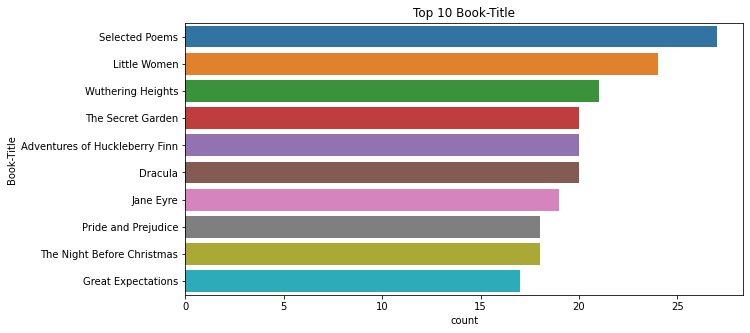

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Book-Title',data=book_df, order=pd.value_counts(book_df['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()

* We have 2,42,130 unique Book Title.
* The top most book title found is Selected Poems.
* Selected Poems is present in 27 rows in books data.

**Book Author**

In [ ]:
book_df['Book-Author'].describe()

count              271354
unique             102020
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

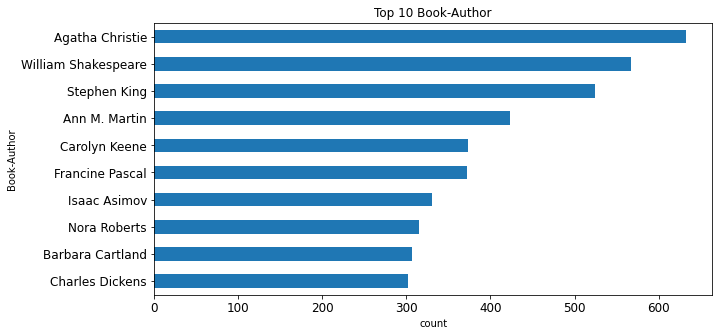

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = book_df['Book-Author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

* We have 1,02,020 unique Author.
* The top most author found is Agatha Christie.
* We have 632 Agatha Christie in books data.

**Publisher**

In [ ]:
book_df['Publisher'].describe()

count        271354
unique        16803
top       Harlequin
freq           7535
Name: Publisher, dtype: object

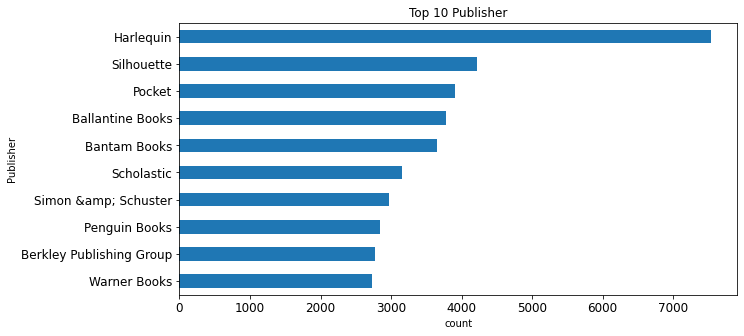

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = book_df['Publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

* We have 16,803 unique Publishers.
* The top most Publishers found is Harlequin.
* We have 7,535 Harlequin in books data.

**Year Of Publication**

In [ ]:
book_df['Year-Of-Publication'].describe()

count    271354.000000
mean       1993.693098
std           8.250006
min        1376.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

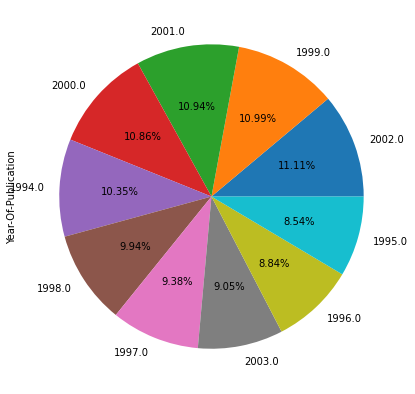

In [ ]:
fig= plt.figure(figsize=(15,7))
book_df['Year-Of-Publication'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

* Most books were published in the year of 2002.

**Location**

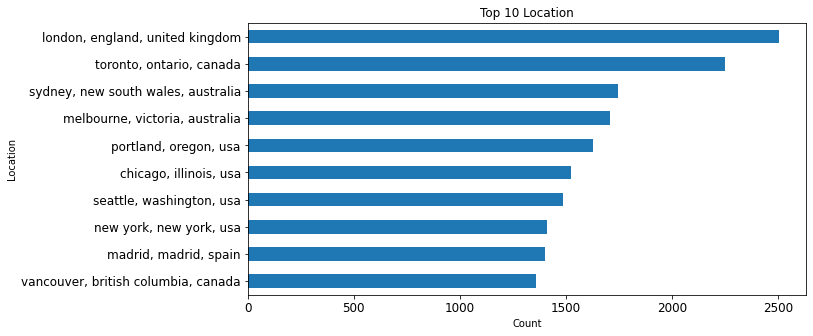

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = users_df['Location'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Location', fontsize=12)
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

**Age**

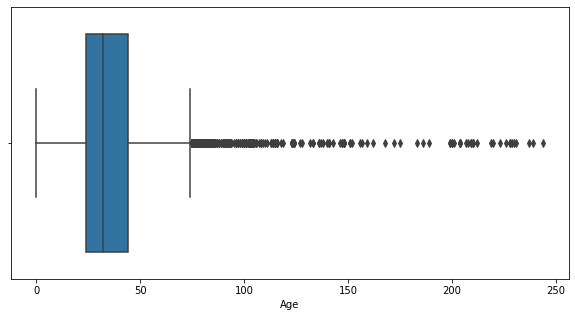

In [ ]:
# Checking the Outliers in Age.
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

* Here we are having some outliers. Let's fix it.

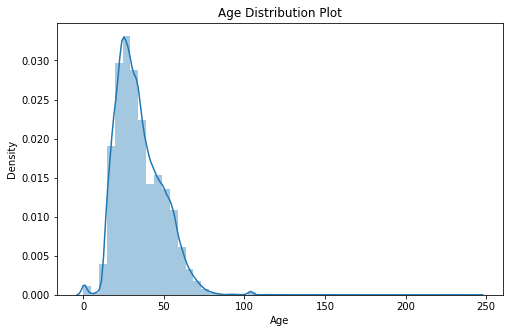

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(users_df.Age)
plt.title('Age Distribution Plot')
plt.show()

**Handling Outliers**

Remove the Age greater than 90 and less than 8.

In [ ]:
# First we are filling the nan value where the age is greater than 90 and less than 8 then replacing the nan with mean value.
users_df.loc[(users_df['Age'] > 90) | (users_df['Age'] < 8), 'Age']= np.NAN
users_df['Age']= users_df['Age'].fillna(users_df['Age'].mean())
users_df['Age']= users_df['Age'].astype(np.int32)

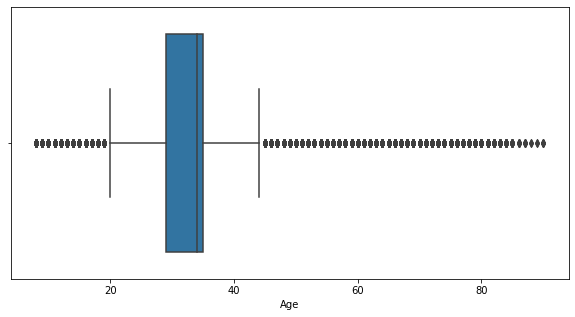

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

**Book-Rating**

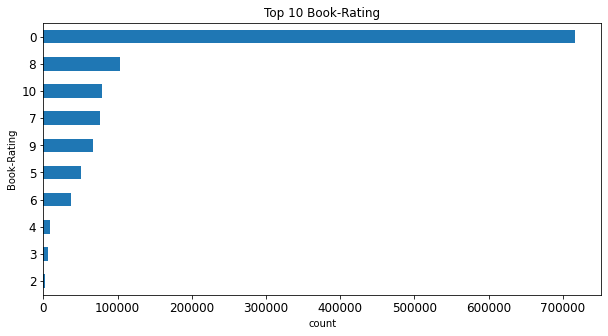

In [ ]:
# Checking the ratings.
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = ratings_df['Book-Rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Rating')
plt.show()

* Highest rating is 8 out of 10.
* Lowest rating is 2 out of 10.
* Most of the people haven't given the ratings.

Check the number of users who have given the rating.

In [ ]:
users_df['User-ID'].shape

(278858,)

In [ ]:
ratings_df['User-ID'].value_counts().shape

(105283,)

* Out of 2,78,858 users only 1,05,283 users who have given the ratings.

# **Collaborative Filtering**

Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


## **Collaborative Filtering Using k-Nearest Neighbors (kNN)**

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user.

First, we need to find out the average rating, and the number of ratings each book received.

In [ ]:
average_rating = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False)

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


* In this data set, the book that received most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

##**Note**
**To ensure statistical significance, We will consider only those books in which atleast 50 ratings have been given by the users and users who have given atleast 50 ratings**

In [ ]:
counts1 = ratings_df['User-ID'].value_counts()
ratings_df = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 50].index)]
counts = ratings_df['Book-Rating'].value_counts()
ratings_df = ratings_df[ratings_df['Book-Rating'].isin(counts[counts >= 50].index)]

Combining the two dataset ratings data and books data.

In [ ]:
combine_book_rating = pd.merge(ratings_df, book_df, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head(20)

,User-ID,ISBN,Book-Rating,Book-Title
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels)
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels)
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels)
5,9177,0446364193,7,Along Came a Spider (Alex Cross Novels)
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels)
7,11676,0446364193,8,Along Came a Spider (Alex Cross Novels)
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels)
9,15418,0446364193,0,Along Came a Spider (Alex Cross Novels)


We then group by book titles and create a new column for total rating count.

In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'TotalRatingCount'})
     [['Book-Title', 'TotalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [ ]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [ ]:
rating_with_totalRatingCount['TotalRatingCount'].describe()

count    703428.000000
mean         35.009198
std          68.960202
min           1.000000
25%           2.000000
50%           8.000000
75%          34.000000
max         852.000000
Name: TotalRatingCount, dtype: float64

In [ ]:
# Converting the values into float data type.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# It provides the descriptive statistcs of the data.
print(book_ratingCount['TotalRatingCount'].describe())

count   199182.00
mean         3.53
std         10.54
min          1.00
25%          1.00
50%          1.00
75%          3.00
max        852.00
Name: TotalRatingCount, dtype: float64


* The median book has been rated only once. 

Let’s look at from 90% to 99% to identify the TotalRatingCounts for each of the quantile.

In [ ]:
print(book_ratingCount['TotalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90    6.00
0.91    7.00
0.92    7.00
0.93    8.00
0.94    9.00
0.95   11.00
0.96   13.00
0.97   17.00
0.98   23.00
0.99   39.00
Name: TotalRatingCount, dtype: float64


* We can see about 99% of books received below 39 ratings.
* Only about 1% of books recieved 39 or more ratings.

As we have so many books in our data, we will limit to above 30 ratings only.

In [ ]:
# Limiting TotalRatingCount above 30 ratings.
popularity_threshold = 30
rating_popular_book = rating_with_totalRatingCount.query('TotalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [ ]:
# Checking the total size of rating_popular_book.
rating_popular_book.shape

(192670, 5)

Check the number of unique books with respect to the ISBN

In [ ]:
rating_popular_book['ISBN'].nunique()

7653

* Now, we have 4183 unique books

# **Filter to users in US**

In order to improve computing speed, and not run into the 'MemoryError' issue we will limit our users data to those in the US. Then combine the user data with rating data and total rating count data.

In [ ]:
combined = rating_popular_book.merge(users_df, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_user_rating = combined[combined['Location'].str.contains("usa")]
us_user_rating=us_user_rating.drop('Age', axis=1)
us_user_rating

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"omaha, nebraska, usa"
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"sunnyvale, california, usa"
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"los angeles, california, usa"
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"providence, rhode island, usa"
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"mechanicsville, maryland, usa"
...,...,...,...,...,...,...
192665,275970,051756338X,0,Sarum: The Novel of England,45,"pittsburgh, pennsylvania, usa"
192666,275970,0865714215,0,Stormy Weather,59,"pittsburgh, pennsylvania, usa"
192667,275970,1586210661,9,Me Talk Pretty One Day,257,"pittsburgh, pennsylvania, usa"
192668,276688,0517145553,0,Mostly Harmless,30,"fort lee, new jersey, usa"


Remove the duplicates present in rating popular book data.

In [ ]:
if not rating_popular_book[rating_popular_book.duplicated(['User-ID', 'Book-Title'])].empty:

    # Identifying number of rows corresponding to the US.
    print('Actual rating_popular_book shape {0}'.format(rating_popular_book.shape))

    rating_popular_book = rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'])

    # Identifying number of rows corresponding to the US duplicates.
    print('Rating_popular_book shape after removing the duplicates  {0}'.format(rating_popular_book.shape))

Actual rating_popular_book shape (192670, 5)
Rating_popular_book shape after removing the duplicates  (189333, 5)


# **Implementing kNN**

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “auto”, and we specify “metric=minkowski”. Finally, we fit the model.

At first create a pivote table.

In [ ]:
from scipy.sparse import csr_matrix
us_user_rating_pivot = rating_popular_book.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_user_rating_matrix = csr_matrix(us_user_rating_pivot.values)

**Finding the Nearest Neighbors**

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

**Test our model and make few recommendation**

In [ ]:
query_index = np.random.choice(us_user_rating_pivot.shape[0])
print(query_index)


1764


In [ ]:
distances, indices = model_knn.kneighbors(us_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
us_user_rating_pivot.index[query_index]

'Self-Defense (Alex Delaware Novels (Paperback))'

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Self-Defense (Alex Delaware Novels (Paperback)):

1: Over the Edge: An Alex Delaware Novel (Alex Delaware Novels (Paperback)), with distance of 0.5765392389288437:
2: Silent Partner (Alex Delaware Novels (Paperback)), with distance of 0.6941770288305721:
3: The Butcher's Theater, with distance of 0.700579006165146:
4: The Horse You Came In On, with distance of 0.7177851527207013:
5: Survival of the Fittest: An Alex Delaware Novel, with distance of 0.726257606844609:


**We are only considering those ratings that are not eqaul to 0.**

In [ ]:
us_user_rating.shape

(151815, 6)

In [ ]:
# Ratings that are not 0.
us_user_rating= us_user_rating[us_user_rating['Book-Rating'] != 0]

In [ ]:
us_user_rating.shape

(42020, 6)

In [ ]:
us_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"mechanicsville, maryland, usa"
12,18082,0446364193,7,Along Came a Spider (Alex Cross Novels),198,"southern, california, usa"
13,19085,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"menomonie, wisconsin, usa"
14,21031,0446364193,10,Along Came a Spider (Alex Cross Novels),198,"alexandria, virginia, usa"
18,28177,0446364193,7,Along Came a Spider (Alex Cross Novels),198,"grand rapids, michigan, usa"


# **Filtering users with atleast 10 interaction**

In [ ]:
users_interactions_count_df = us_user_rating.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 2022
Number of users with at least 10 interactions: 1310


In [ ]:
print('Number of interactions: %d' % len(us_user_rating))
interactions_from_selected_users_df = us_user_rating.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 42020
Number of interactions from users with at least 10 interactions: 38473


In [ ]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
0,243,0446606383,6,The Midnight Club,73,"arden hills, minnesota, usa"
1,243,0316776963,9,Me Talk Pretty One Day,257,"arden hills, minnesota, usa"
2,243,0375400117,10,Memoirs of a Geisha,47,"arden hills, minnesota, usa"
3,243,0449006522,6,Manhattan Hunt Club,58,"arden hills, minnesota, usa"
4,243,0316601950,9,The Pilot's Wife : A Novel,290,"arden hills, minnesota, usa"
5,243,044023722X,7,A Painted House,390,"arden hills, minnesota, usa"
6,243,0446364800,9,The General's Daughter,104,"arden hills, minnesota, usa"
7,243,0316899984,7,"River, Cross My Heart",125,"arden hills, minnesota, usa"
8,243,0060915544,10,The Bean Trees,208,"arden hills, minnesota, usa"
9,243,0060977493,7,The God of Small Things,153,"arden hills, minnesota, usa"


## **We are applying log transformation to smooth the distribution!!**

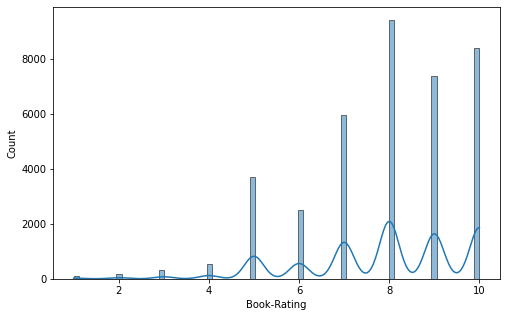

In [ ]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [ ]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 38473


,ISBN,User-ID,Book-Rating
0,0020198906,7346,3.17
1,0020198906,14422,3.32
2,0020198906,108352,3.00
3,0020198906,140036,3.17
4,0020198906,157273,3.17


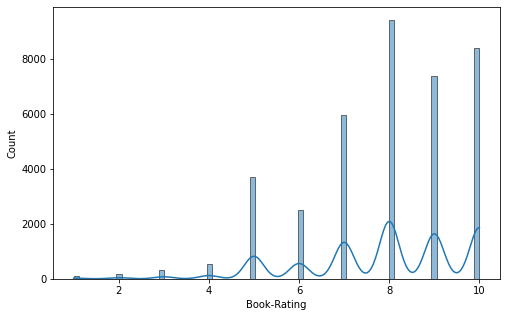

In [ ]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

# **Splitting data into Train And Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('Number interactions on Train set: %d' % len(interactions_train_df))
print('Number interactions on Test set: %d' % len(interactions_test_df))

Number interactions on Train set: 30778
Number interactions on Test set: 7695


In [ ]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
22522,0449912558,2891,3.32
32046,0671759345,147847,3.32
29954,0670865796,251140,3.00
19007,0440498058,76168,3.32
23228,0451173317,55490,3.46


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0020198906,002026478X,0020412401,0020442203,0020442408,0020442505,0020442602,002542730X,0027701301,0028604199,0028604202,0030615534,0060001453,0060001941,006000438X,0060008024,0060008032,0060008245,0060008296,0060008776,0060009241,0060011173,006001203X,0060013117,0060013125,0060080841,0060083948,0060085444,0060085452,0060086246,0060086386,0060089539,0060090367,0060090375,0060090383,0060092572,0060092645,0060093595,0060095628,0060096195,...,1575667614,1576736083,1576737330,1578150450,157815054X,1586210661,1586212230,1586214055,1586214497,1586215027,1586215981,1587882337,1587883643,1587887789,1590071352,1590580362,1590863518,1590864670,1592400876,1593551649,1594140979,1841954608,1842322761,1860462588,1878424319,1878448900,1882723007,1885171080,1895565669,1896095011,1896860982,1898901147,1930252250,1931056323,193156146X,1931561648,555053150X,9500704447,B0000T6KHI,B0001GMSV2
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
243,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
254,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
507,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
638,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
882,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Check the list of user id of the users
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[243, 254, 507, 638, 882, 1435, 1733, 1848, 2033, 2110]

# **SVD - Model Based Collaborative Filtering**

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.


# **A=U.Sigma.VT**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(1310, 5025)

In [ ]:
U.shape

(1310, 15)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [ ]:
Vt.shape

(15, 5025)

**After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.**

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.91190667e-02,  2.26021928e-02,  1.01822675e-03, ...,
         2.87086985e-03,  1.56326301e-02, -2.97755473e-04],
       [ 5.21664643e-03,  1.13783671e-02,  7.50119278e-03, ...,
         8.90930668e-03, -1.64022879e-02,  1.94177767e-03],
       [ 6.46062370e-03, -2.33151808e-02,  3.56524970e-04, ...,
        -8.80802917e-04,  3.81536971e-03,  5.11459951e-05],
       ...,
       [ 3.30463341e-02, -1.97329475e-02,  6.73288850e-04, ...,
        -9.48356969e-03, -1.49806243e-02,  1.77394962e-04],
       [ 4.61456533e-03,  5.38652349e-02,  4.38433014e-03, ...,
         2.30263565e-02,  4.62369888e-02, -1.40004446e-03],
       [ 3.54610025e-03,  1.93427821e-02,  2.35286560e-03, ...,
        -3.85122630e-04,  5.09639620e-03,  2.39864772e-04]])

In [ ]:
all_user_predicted_ratings.shape

(1310, 5025)

**Making DataFrame from our predicted ratings.**

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,243,254,507,638,882,1435,1733,1848,2033,2110,2276,2766,2891,2977,3145,3167,3363,3371,3373,3827,4017,4938,5539,5582,6073,6251,6323,6543,6563,6575,7125,7158,7283,7346,7915,8066,8067,8245,8253,8362,...,269835,269890,270352,270605,270801,270820,270838,270906,271144,271176,271195,271448,271538,271558,271705,272573,273086,273113,273979,274056,274061,274308,274549,274634,274808,275970,276050,276165,276231,276463,276680,277427,277639,278026,278137,278188,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0020198906,0.02,0.01,0.01,0.00,0.00,0.01,0.00,-0.00,0.01,0.01,0.03,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.03,-0.00,0.00,0.02,0.01,0.05,0.00,0.06,0.04,0.13,0.01,0.00,0.02,0.19,0.05,0.02,0.09,0.02,0.04,0.01,...,-0.00,0.01,-0.00,0.02,0.02,0.01,-0.00,0.00,0.00,0.01,0.01,0.05,0.01,0.02,0.02,0.04,0.01,-0.01,0.02,0.01,-0.02,0.02,0.01,-0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.00,0.03,0.01,0.02,0.00,0.01,0.00,0.03,0.00,0.00
002026478X,0.02,0.01,-0.02,-0.04,0.01,0.02,-0.01,-0.02,0.02,-0.02,-0.01,0.02,0.02,-0.01,-0.01,0.06,0.04,0.01,0.02,-0.00,0.13,0.02,0.01,-0.01,-0.01,-0.02,-0.02,-0.02,0.00,-0.11,0.02,0.01,0.06,0.17,0.01,0.01,0.07,0.02,0.11,0.02,...,-0.01,-0.01,0.00,0.04,-0.01,-0.03,0.02,-0.01,0.05,-0.05,-0.03,-0.00,0.01,-0.01,0.06,0.02,0.03,0.00,0.10,0.03,0.04,-0.02,-0.01,-0.01,0.03,0.01,0.01,-0.03,0.06,0.00,0.00,0.07,0.01,0.02,-0.02,0.01,0.02,-0.02,0.05,0.02
0020412401,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.01,-0.00,0.00,0.00,0.01,0.00,0.00,0.00,-0.00,0.01,0.00,...,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.01,-0.00,0.01,0.00,-0.00,0.00,0.01,-0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.01,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0020442203,-0.00,0.07,-0.00,0.01,0.01,0.00,0.01,0.01,0.06,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,-0.01,0.01,0.00,0.01,0.01,0.07,0.01,-0.00,0.01,-0.01,-0.01,-0.00,0.00,0.02,-0.00,-0.00,-0.01,0.01,0.02,0.00,...,0.01,0.00,0.00,0.01,-0.00,0.01,0.00,0.00,0.01,0.09,0.02,0.01,0.01,0.01,0.03,0.01,0.01,-0.03,0.00,0.01,0.05,0.01,0.00,0.01,0.00,0.01,0.01,0.08,0.00,0.01,0.00,0.00,0.00,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.02
0020442408,0.00,0.02,-0.00,-0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,-0.00,0.00,0.00,0.00,0.01,-0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,-0.00,0.01,-0.01,-0.00,-0.00,0.01,0.02,-0.01,0.00,-0.02,0.01,0.01,0.00,...,0.00,0.00,0.00,0.01,-0.00,0.02,0.01,0.00,0.01,0.01,0.02,-0.01,0.01,0.02,0.02,0.01,0.01,-0.03,0.01,0.01,0.04,0.02,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,-0.00,0.01,0.01,-0.00,0.00,0.00,0.00,-0.01,-0.00,0.01


In [ ]:
len(cf_preds_df.columns)

1310

In [ ]:
global book_df
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.00,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.00,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.00,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.00,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.00,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### **Colaborative Filtering Recommender Class**

In [ ]:
import random

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(book_df,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

# **Evaluation**

### In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* ### For each user
    * ### For each item the user has interacted in test set
        * ### Sample 100 other items the user has never interacted.   
        * ### Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ### Aggregate the global Top-N accuracy metrics

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [ ]:
print(list(interactions_full_indexed_df.index.values))

[7346, 14422, 108352, 140036, 157273, 68943, 95359, 104113, 248718, 264947, 271448, 190708, 16634, 55492, 96448, 114414, 122429, 173291, 197687, 203240, 228998, 16634, 38023, 66878, 126736, 38023, 93363, 228021, 16634, 88733, 228021, 243294, 257028, 10030, 12538, 16996, 41084, 52584, 71712, 110934, 113270, 128835, 150979, 171602, 173291, 174216, 175117, 179734, 183995, 208671, 225763, 229741, 269566, 277427, 12538, 123257, 130554, 7346, 52584, 150979, 155147, 249894, 23571, 52584, 113904, 125519, 128835, 196160, 249894, 251843, 172742, 37208, 98391, 107784, 176214, 261998, 269321, 193676, 4017, 6575, 8454, 10560, 17003, 89602, 104113, 115435, 201042, 224349, 259626, 29526, 44845, 93426, 135149, 142715, 165308, 205980, 227836, 265115, 271705, 98391, 27472, 261829, 98391, 174216, 229011, 254377, 258185, 265115, 203799, 13552, 16795, 31315, 61854, 131046, 235282, 242106, 93047, 94951, 98391, 114988, 271558, 254899, 123790, 169233, 202277, 216466, 249894, 40415, 69378, 124487, 187574, 2147

In [ ]:
user=int(input("Enter User ID from above list for book recommendation:  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation:  104113
Recommendation for User-ID =  104113
         ISBN                                         Book-Title  recStrength
0  0312195516                The Red Tent (Bestselling Backlist)         0.44
1  0060928336    Divine Secrets of the Ya-Ya Sisterhood: A Novel         0.25
2  0316769487                             The Catcher in the Rye         0.23
3  0375726403                                       Empire Falls         0.23
4  0140293248            The Girls' Guide to Hunting and Fishing         0.21
5  0060987529        Confessions of an Ugly Stepsister : A Novel         0.20
6  0385722206  Balzac and the Little Chinese Seamstress : A N...         0.20
7  0679429220  Midnight in the Garden of Good and Evil: A Sav...         0.20
8  0312278586                         The Nanny Diaries: A Novel         0.19
9  0671027360                                Angels &amp; Demons         0.19


In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [ ]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
1309 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.3078622482131254, 'recall@10': 0.4223521767381416, 'recall@15': 0.5055230669265757}


,hits@5_count,hits@10_count,hits@15_count,interacted_count,recall@5,recall@10,recall@15,User-ID
58,19,25,30,63,0.30,0.40,0.48,16795
68,20,26,28,61,0.33,0.43,0.46,98391
138,18,29,34,59,0.31,0.49,0.58,153662
72,28,35,40,52,0.54,0.67,0.77,114368
69,24,27,28,51,0.47,0.53,0.55,104636
38,6,10,12,50,0.12,0.20,0.24,95359
55,6,15,19,43,0.14,0.35,0.44,158295
115,6,11,14,35,0.17,0.31,0.40,60244
264,21,27,28,35,0.60,0.77,0.80,123883
189,5,7,9,33,0.15,0.21,0.27,31315


# **Conclusion**

As we can see, after implementing Collaborative Filtering and evaluating it using SVD matrix we are satisfied with the results. A recall rate of around 50 for hit@15 is fair enough for such a large dataset. Also since it is an unsupervised learning algorithm trying to find good books that users will likes which in itself is a very vast and complicated study.


